# Students Do: Predicting Fraudulent Loans Applications

According to the American Bankers Association, [_"every dollar of fraud now costs banks and credit unions roughly $2.92"_](https://www.aba.com/member-tools/industry-solutions/insights/state-card-fraud-2018), that's a reason why predicting fraud using machine learning techniques becomes a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for FinTech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

In this activity, you are going to explore how tree based algorithms can be used to identify fraudulent loan applications. You will start using a decision tree model, that will be trained with the `sba_loans_encoded.csv` file that you created before.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [2]:
# Loading data
file_path = Path("../Resources/sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [3]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [4]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]])

Split the data into training and testing sets.

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()



In [7]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)



In [8]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [9]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()



In [10]:
# Fit the model
model = model.fit(X_train_scaled, y_train)


## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [11]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,324,20
Actual 1,24,157


Accuracy Score : 0.9161904761904762
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       344
           1       0.89      0.87      0.88       181

    accuracy                           0.92       525
   macro avg       0.91      0.90      0.91       525
weighted avg       0.92      0.92      0.92       525



## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

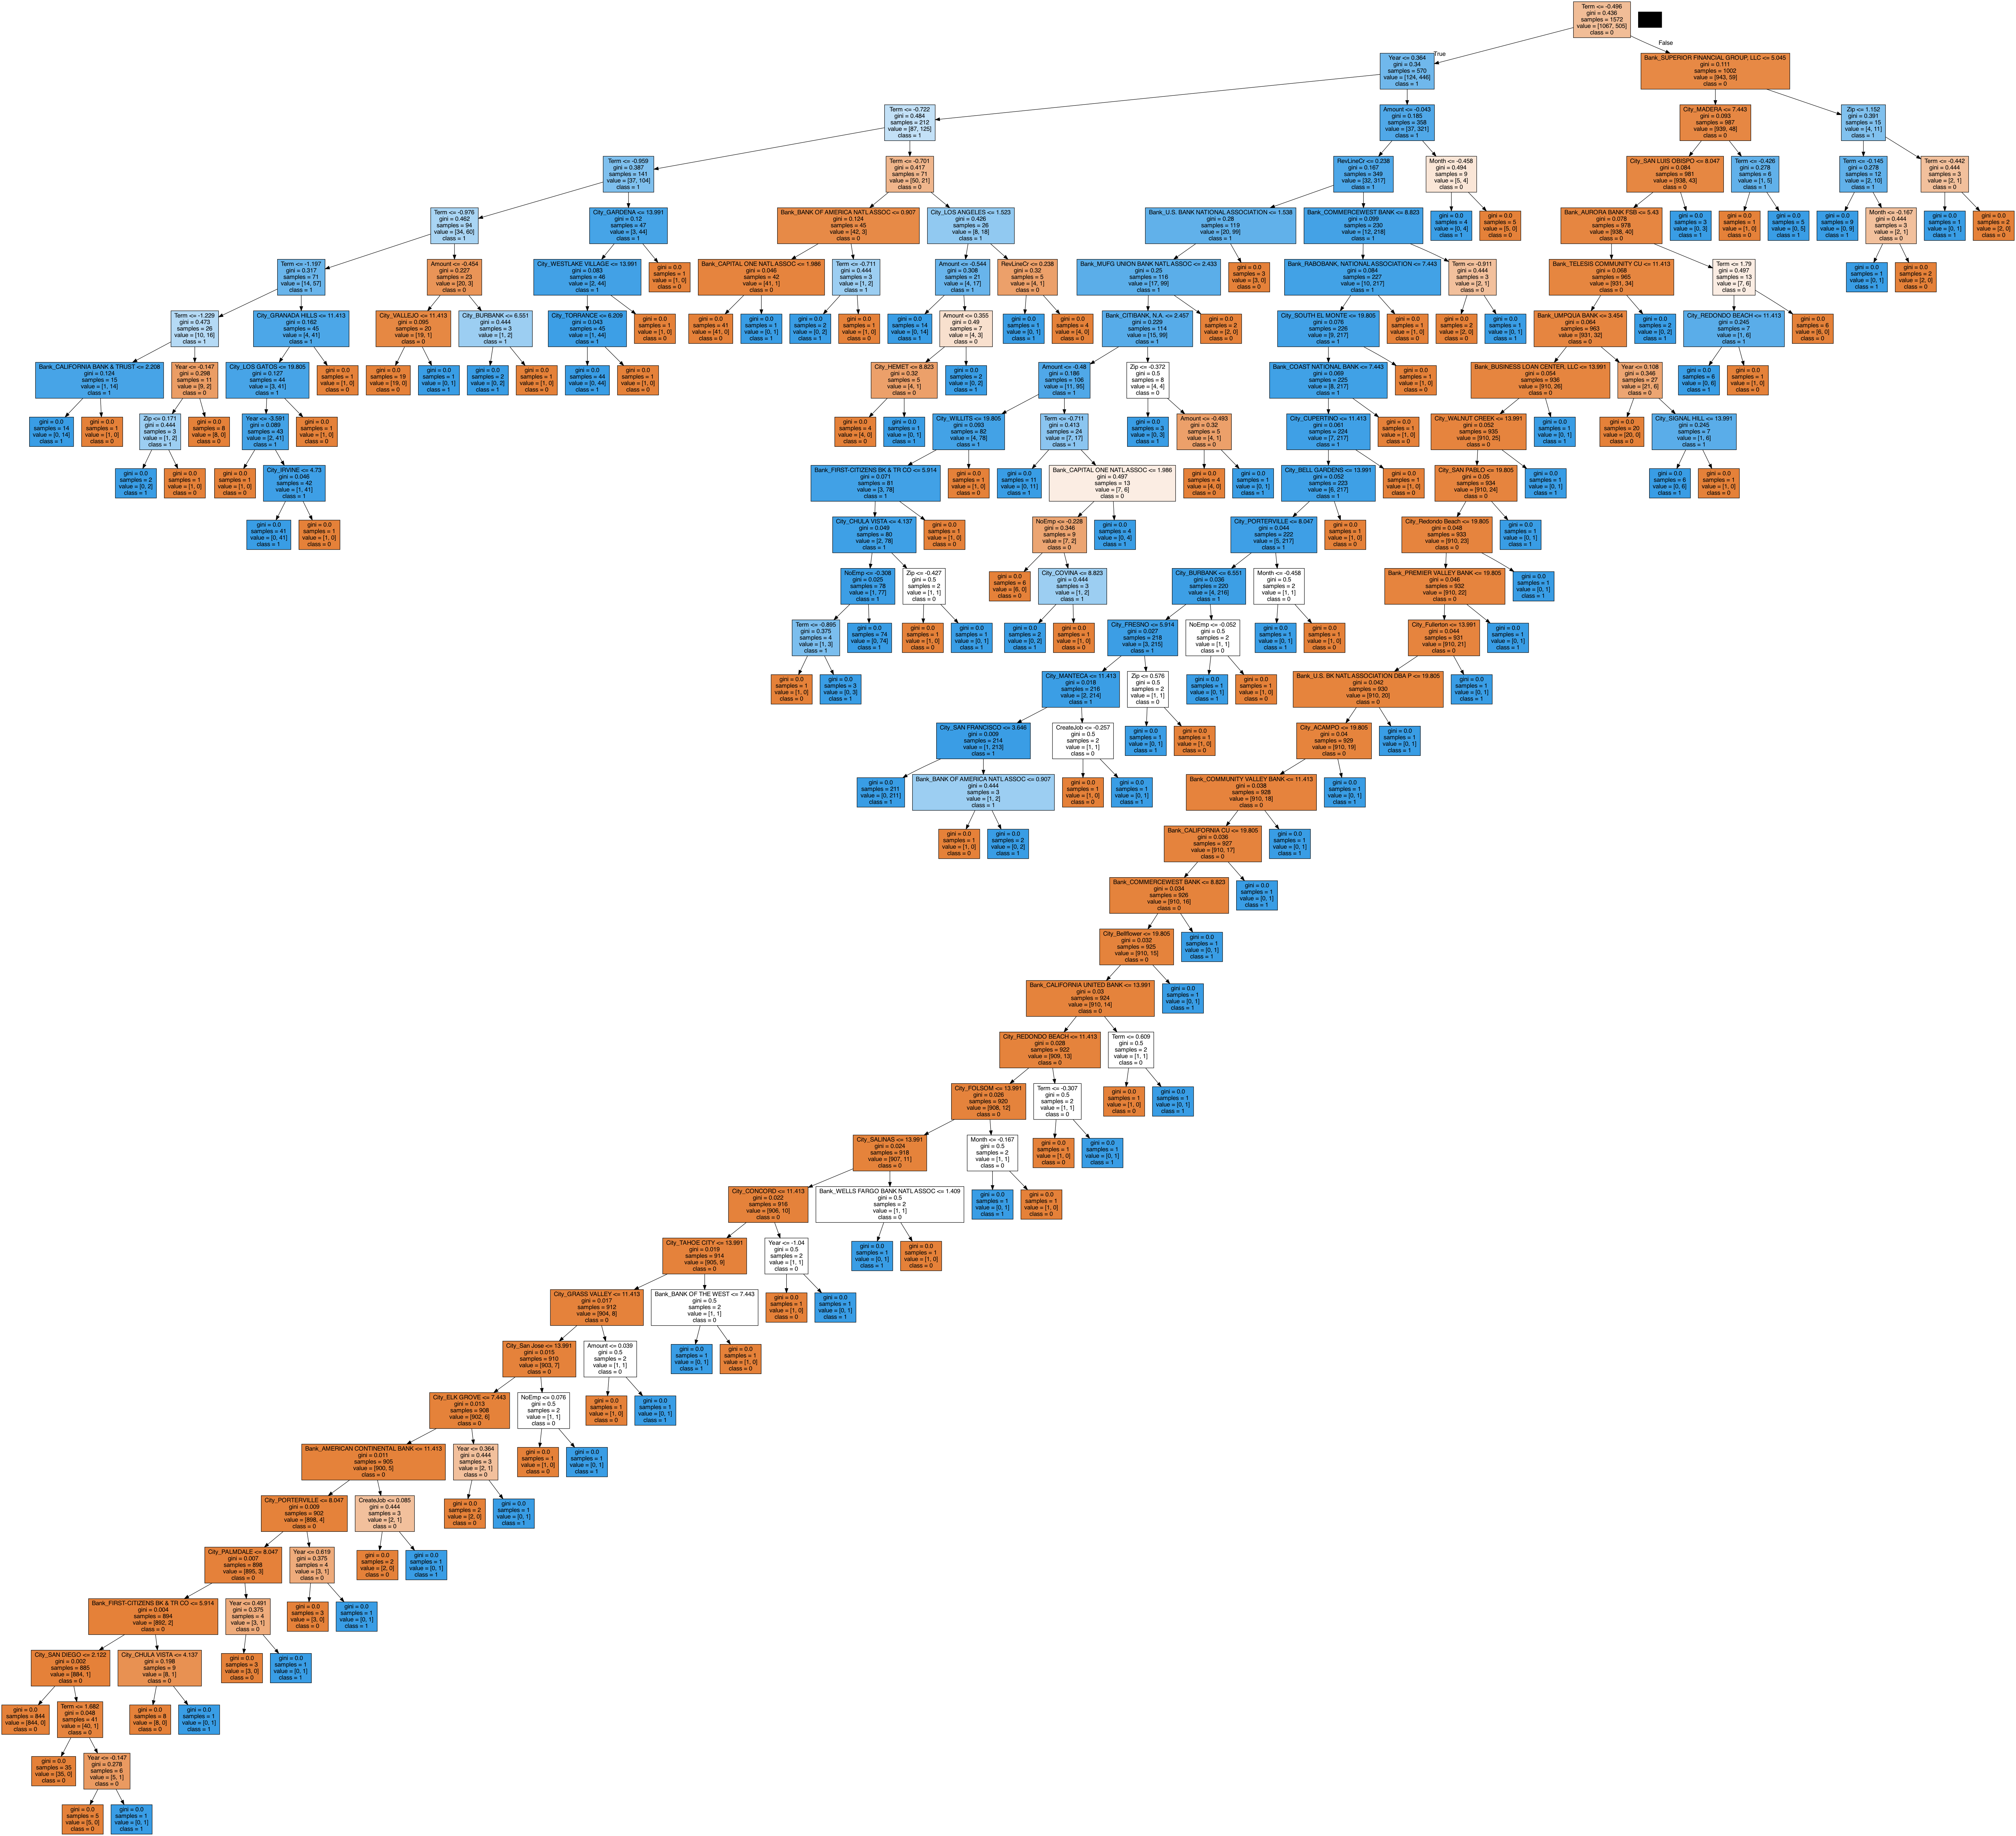

In [14]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [15]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "../Resources/transactions_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "../Resources/transactions_tree.png"
graph.write_png(file_path)


True